In [2]:
import os
train_norm_dir=os.path.join('./Training/Normal')
train_notn_dir=os.path.join('./Training/Not Normal')

test_norm_dir=os.path.join('./Validation/Normal')
test_notn_dir=os.path.join('./Validation/Not Normal')

In [4]:
train_norm_names=os.listdir(train_norm_dir)
print(len(train_norm_names),train_norm_names[0:5])

train_notn_names=os.listdir(train_notn_dir)
print(len(train_notn_names),train_notn_names[0:5])

test_norm_names=os.listdir(test_norm_dir)
print(len(test_norm_names),test_norm_names[0:5])

test_notn_names=os.listdir(test_notn_dir)
print(len(test_notn_names),test_notn_names[0:5])

550 ['Normal (10).jpg', 'Normal (100).jpg', 'Normal (101).jpg', 'Normal (102).jpg', 'Normal (103).jpg']
822 ['Binder1_Page_006.jpg', 'Binder1_Page_007.jpg', 'Binder1_Page_008.jpg', 'Binder1_Page_009.jpg', 'Binder1_Page_010.jpg']
296 ['Normal (564).jpg', 'Normal (565).jpg', 'Normal (566).jpg', 'Normal (567).jpg', 'Normal (568).jpg']
205 ['Binder1_Page_176.jpg', 'Binder1_Page_177.jpg', 'Binder1_Page_178.jpg', 'Binder1_Page_179.jpg', 'Binder1_Page_180.jpg']


FileNotFoundError: [Errno 2] No such file or directory: './Validation/Normal\\Normal (564).jpg'

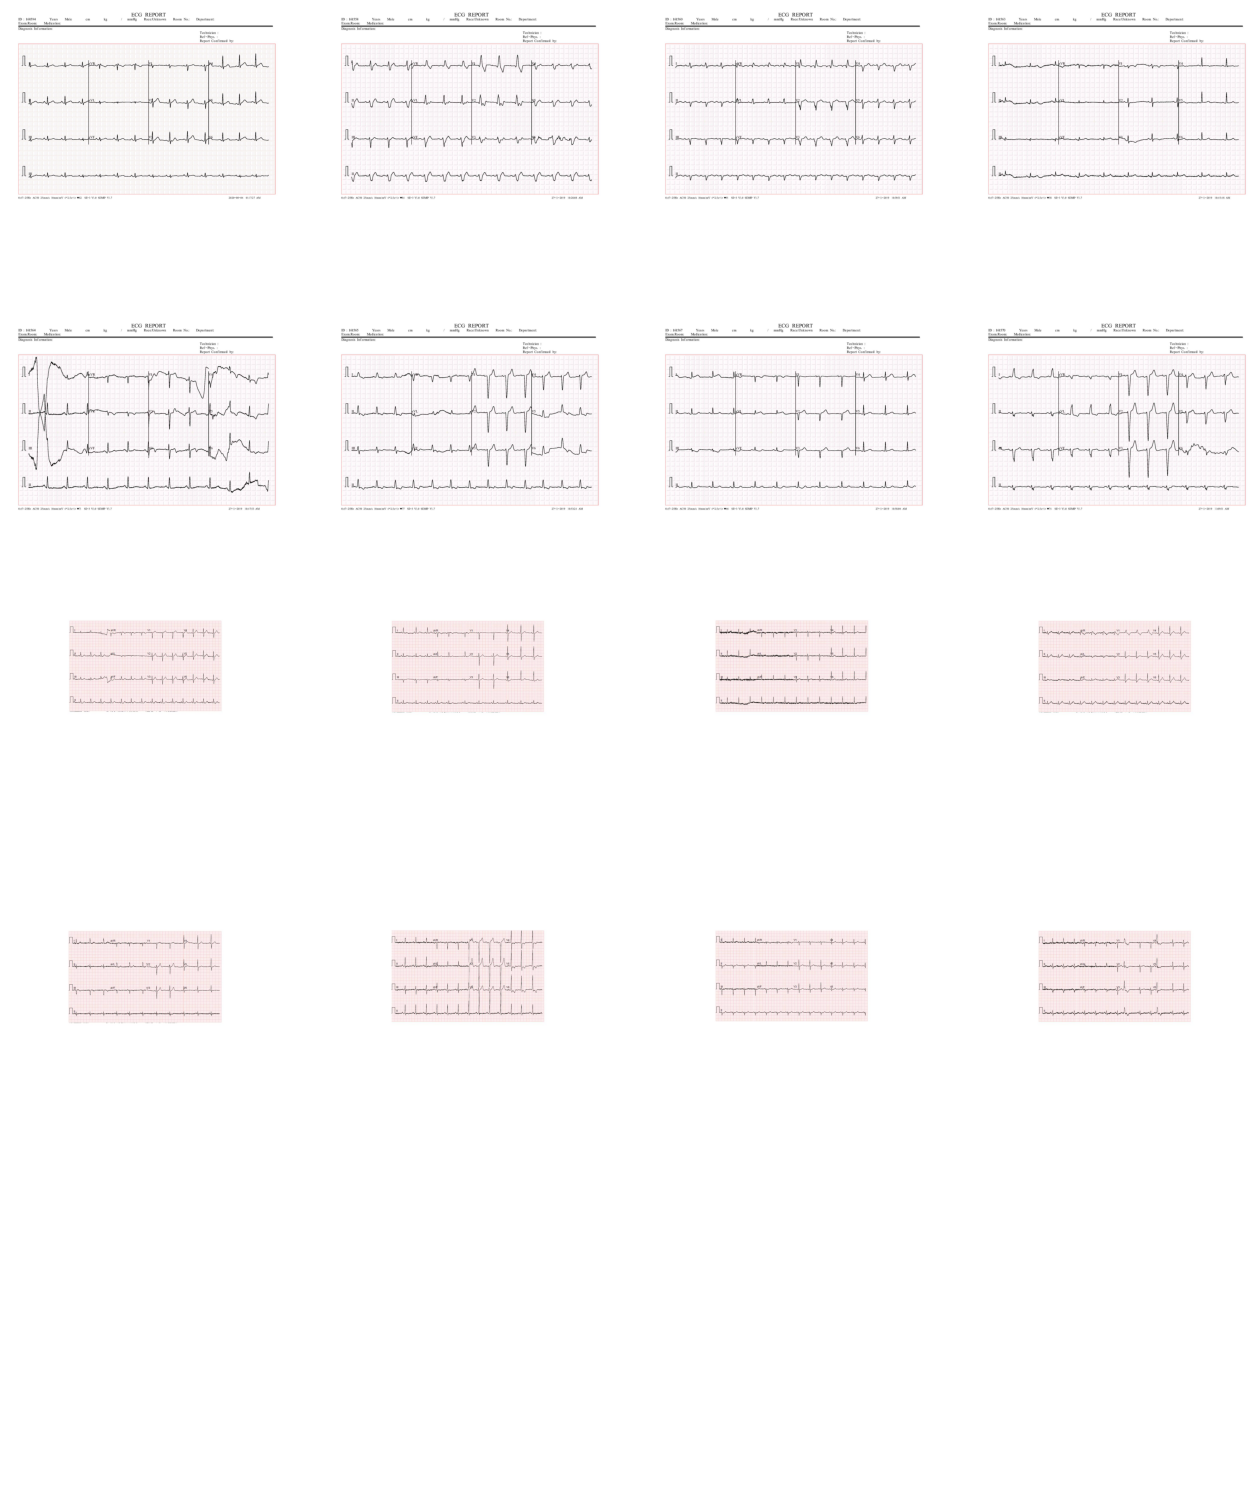

In [8]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 20
ncols = 4

pic_index = 0 # Index for iterating over images

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_norm_pix = [os.path.join(train_norm_dir, fname) 
                for fname in train_norm_names[ pic_index-8:pic_index] 
               ]

next_notn_pix = [os.path.join(train_notn_dir, fname) 
                for fname in train_notn_names[ pic_index-8:pic_index]
                ]
test_norm_pix = [os.path.join(test_norm_dir, fname) 
                for fname in test_norm_names[ pic_index-8:pic_index] 
               ]

test_notn_pix = [os.path.join(test_notn_dir, fname) 
                for fname in test_notn_names[ pic_index-8:pic_index]
                ]

for i, img_path in enumerate(next_norm_pix+next_notn_pix+test_norm_pix+test_notn_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [9]:
import tensorflow as tf 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Input, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import sigmoid

In [11]:
model=Sequential([Conv2D(16,(3,3), activation='relu',input_shape=(300,300,3)),
                 MaxPooling2D(2,2),
                 Conv2D(32,(3,3), activation='relu'),
                 MaxPooling2D(2,2),
                 Conv2D(64,(3,3), activation='relu'),
                 MaxPooling2D(2,2),
                 Conv2D(64,(3,3), activation='relu'),
                 MaxPooling2D(2,2),
                 Conv2D(64,(3,3), activation='relu'),
                 MaxPooling2D(2,2),
                 Flatten(),
                 Dense(512,activation='relu'),
                 Dense(1,activation='sigmoid')])
model.build()

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)      

In [13]:
model.compile(loss=BinaryCrossentropy(),
             optimizer=Adam(learning_rate=0.001),
             metrics=['accuracy'])

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1.0/255)
test_datagen=ImageDataGenerator(rescale=1.0/255)
train_generator=train_datagen.flow_from_directory('./Training',
                                                 target_size=(300,300),
                                                 batch_size=20,
                                                 class_mode='binary')

test_generator=test_datagen.flow_from_directory('./Validation',
                                                 target_size=(300,300),
                                                 batch_size=20,
                                                 class_mode='binary')

Found 1417 images belonging to 2 classes.
Found 456 images belonging to 2 classes.


In [16]:
history=model.fit(train_generator, steps_per_epoch=30, epochs=10, verbose=2, validation_data=test_generator, validation_steps=8)

Epoch 1/10
30/30 - 34s - loss: 0.6133 - accuracy: 0.6000 - val_loss: 0.4420 - val_accuracy: 0.6125 - 34s/epoch - 1s/step
Epoch 2/10
30/30 - 32s - loss: 0.5300 - accuracy: 0.6483 - val_loss: 0.4742 - val_accuracy: 0.4563 - 32s/epoch - 1s/step
Epoch 3/10
30/30 - 31s - loss: 0.5286 - accuracy: 0.6901 - val_loss: 0.4273 - val_accuracy: 0.4812 - 31s/epoch - 1s/step
Epoch 4/10
30/30 - 33s - loss: 0.5119 - accuracy: 0.6817 - val_loss: 0.3303 - val_accuracy: 0.9375 - 33s/epoch - 1s/step
Epoch 5/10
30/30 - 32s - loss: 0.5163 - accuracy: 0.7367 - val_loss: 0.5197 - val_accuracy: 0.6313 - 32s/epoch - 1s/step
Epoch 6/10
30/30 - 31s - loss: 0.5487 - accuracy: 0.6733 - val_loss: 0.3868 - val_accuracy: 0.9062 - 31s/epoch - 1s/step
Epoch 7/10
30/30 - 31s - loss: 0.4447 - accuracy: 0.7783 - val_loss: 0.5142 - val_accuracy: 0.6500 - 31s/epoch - 1s/step
Epoch 8/10
30/30 - 31s - loss: 0.4473 - accuracy: 0.7533 - val_loss: 0.3381 - val_accuracy: 0.8313 - 31s/epoch - 1s/step
Epoch 9/10
30/30 - 31s - loss: 0

In [31]:
from tensorflow.keras.utils import load_img, img_to_array
import os
import numpy as np
from tensorflow.keras.preprocessing import image

# Assuming your file is in the same directory as the Jupyter Notebook
file_name = 'HB326.jpg'  # Replace with the actual file name

# Construct the path to the file
path = os.path.join(os.getcwd(), file_name)

# Predicting images
img = image.load_img(path, target_size=(300, 300)) #dimensions match huna parcha
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(classes[0])
if classes[0] < 0.5:
    print(file_name + " is normal")
else:
    print(file_name + " is not normal")

1/1 [==============================] - 0s 31ms/step
[1.]
HB326.jpg is not normal


In [32]:
model.save('model.h5')

In [33]:
model=tf.keras.models.load_model('model.h5')

In [34]:
import matplotlib.pyplot as plt
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))


<Figure size 640x480 with 0 Axes>

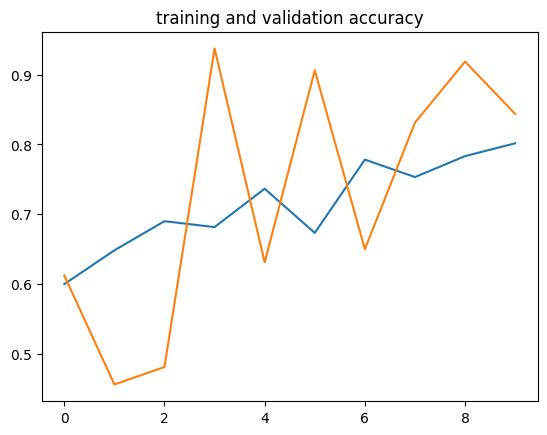

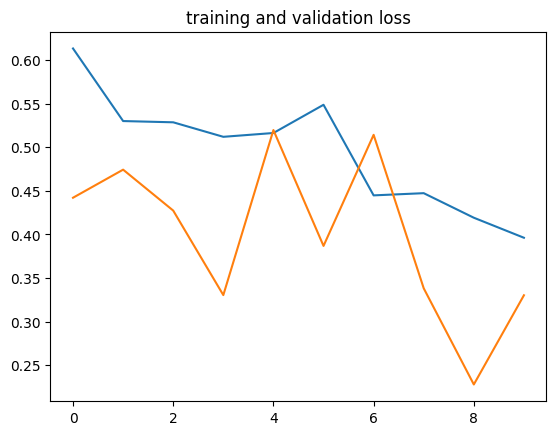

<Figure size 640x480 with 0 Axes>

In [37]:
plt.plot(epochs,acc,label='training')
plt.plot(epochs,val_acc,label='validation')
plt.title("training and validation accuracy")
plt.figure()

plt.plot(epochs,loss)
plt.plot(epochs,val_loss)
plt.title("training and validation loss")
plt.figure()